# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [1]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [2]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
# Cargar los datos
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [6]:
# Vista general del DataFrame
print("🔹 Dimensiones del dataset:", df_airbnb.shape)
print("🔹 Columnas:", df_airbnb.columns.tolist())

🔹 Dimensiones del dataset: (13232, 9)
🔹 Columnas: ['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price']


In [8]:
# Tipos de datos y valores nulos
print("\n🔍 Información general del DataFrame:")
print(df_airbnb.info())


🔍 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB
None


In [9]:
# Verificar valores nulos por columna
print("\n❗ Valores nulos por columna:")
print(df_airbnb.isnull().sum())


❗ Valores nulos por columna:
room_id                  0
host_id                  0
room_type                0
neighborhood             0
reviews                  0
overall_satisfaction    10
accommodates             0
bedrooms                 0
price                    0
dtype: int64


In [10]:
# Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas:")
display(df_airbnb.describe())


📊 Estadísticas descriptivas:


,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


In [11]:
# Primeros registros
print("\n👀 Primeras filas del dataset:")
display(df_airbnb.head())


👀 Primeras filas del dataset:


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso.


Nota:
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [12]:
# Filtro: más de 10 reviews y puntuación > 4, al menos 3 habitaciones
alicia_df = df_airbnb[
    (df_airbnb['accommodates'] >= 4) &
    (df_airbnb['bedrooms'] >= 3) & # 3 dormitorios: padres + 2 hijos
    (df_airbnb['reviews'] > 10) &
    (df_airbnb['overall_satisfaction'] > 4)
]

# Ordenar por satisfacción (descendente), luego por reviews
alicia_df = alicia_df.sort_values(
    by=['overall_satisfaction', 'reviews'],
    ascending=[False, False]
)

# Mostrar 3 opciones recomendadas
alicia_df.head(3)


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
16,44043,192830,Entire home/apt,Santa Maria Maior,316,5.0,7,3.0,80.0
2899,4132059,20604318,Entire home/apt,Misericórdia,273,5.0,6,3.0,48.0
688,785650,4141894,Entire home/apt,Santa Maria Maior,266,5.0,5,3.0,133.0


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [14]:
# Filtrar por room_id de Roberto y Clara
roberto_clara_df = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]

# Guardar a Excel
roberto_clara_df.to_excel("roberto.xlsx", index=False)



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [15]:
# Filtro de precio
diana_df = df_airbnb[df_airbnb['price'] <= 50]

# Habitaciones compartidas ordenadas por satisfacción y luego por número de reviews
shared = diana_df[diana_df['room_type'] == 'Shared room'].sort_values(
    by=['overall_satisfaction', 'reviews'],
    ascending=[False, False]
)

# Otras habitaciones ordenadas solo por precio
otros = diana_df[diana_df['room_type'] != 'Shared room'].sort_values(by='price')

# Combinar, priorizando las compartidas mejor calificadas
diana_ordenado = pd.concat([shared, otros])

# Mostrar las 10 mejores opciones
diana_ordenado.head(10)


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
7034,12268067,66077974,Shared room,Arroios,96,5.0,1,1.0,16.0
7060,12299998,66077974,Shared room,Arroios,49,5.0,1,1.0,13.0
7066,12305540,66077974,Shared room,Arroios,40,5.0,1,1.0,13.0
6399,11278059,58899339,Shared room,Arroios,27,5.0,9,1.0,22.0
3663,5725814,29676067,Shared room,Misericórdia,23,5.0,6,1.0,21.0
4911,7722107,40574313,Shared room,Avenidas Novas,22,5.0,4,1.0,36.0
6459,11427995,32344156,Shared room,Misericórdia,21,5.0,8,1.0,18.0
3727,5803348,29676067,Shared room,Misericórdia,19,5.0,9,1.0,20.0
7312,12826213,6981742,Shared room,Alvalade,19,5.0,1,1.0,22.0
5964,10172929,52218341,Shared room,Areeiro,17,5.0,1,1.0,20.0


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados.
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


####  Agrupamiento 1: Cantidad de alojamientos por tipo de habitación (room_type)

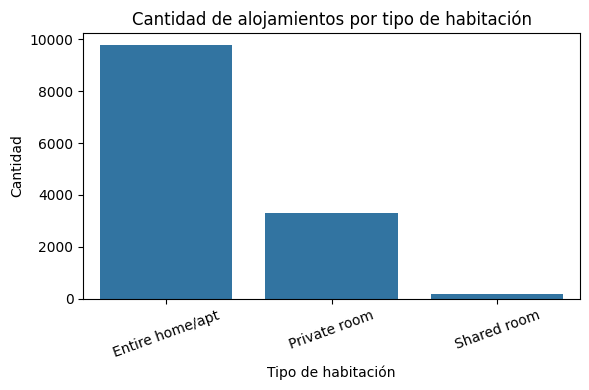

In [16]:
# Agrupamiento 1: Conteo por tipo de habitación
group1 = df_airbnb.groupby('room_type').size().reset_index(name='count')

# Gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=group1, x='room_type', y='count')
plt.title('Cantidad de alojamientos por tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


####  Agrupamiento 2: Promedio de satisfacción por barrio (neighborhood)

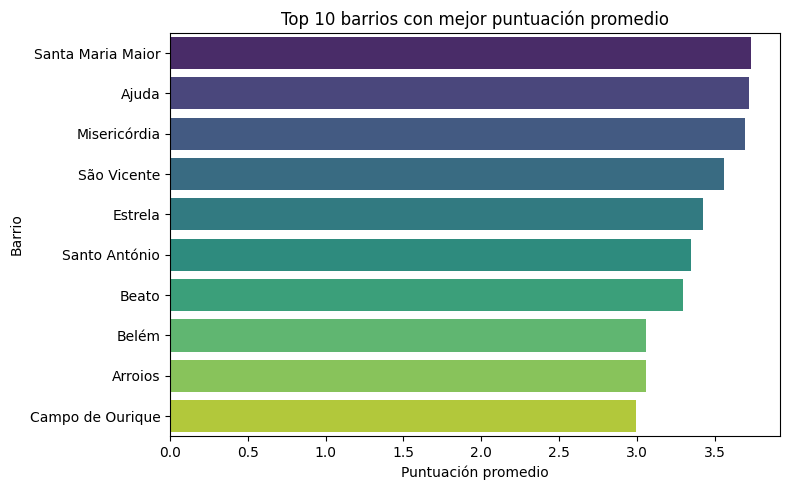

In [18]:
# Agrupamiento 2
group2 = df_airbnb.groupby('neighborhood')['overall_satisfaction'].mean().reset_index()

# Tomar top 10 barrios con mayor satisfacción promedio
top10_barrios = group2.sort_values(by='overall_satisfaction', ascending=False).head(10)

# Gráfico de barras horizontales (corregido el warning)
plt.figure(figsize=(8,5))
sns.barplot(
    data=top10_barrios,
    x='overall_satisfaction',
    y='neighborhood',
    hue='neighborhood',
    palette='viridis',
    legend=False  # Ocultamos leyenda para evitar redundancia
)
plt.title('Top 10 barrios con mejor puntuación promedio')
plt.xlabel('Puntuación promedio')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()
